# Imports

In [1]:
using EpistemicNetworkAnalysis

# Load Data

In [3]:
data = ena_dataset("shakespeare.data")
display(data)

,X,RowID,Type,Play,Act,Scene,Utterance_Index,Line_Index
,Int64,Int64,String7…,String3…,Int64,Int64,Int64,String
1,1,1,tragedy,Hamlet,1,1,1,1.1.1
2,2,2,tragedy,Hamlet,1,1,2,1.1.2
3,3,3,tragedy,Hamlet,1,1,3,1.1.3
4,4,4,tragedy,Hamlet,1,1,4,1.1.4
5,5,5,tragedy,Hamlet,1,1,5,1.1.5
6,6,6,tragedy,Hamlet,1,1,6,1.1.6
7,7,7,tragedy,Hamlet,1,1,7,1.1.7
8,8,8,tragedy,Hamlet,1,1,8,1.1.8 / 1.1.9
9,9,9,tragedy,Hamlet,1,1,9,1.1.10


# ENA Model

## Required Parameters

The `ENAModel` constructor has four required parameters:

1. A DataFrame containing the data to be analyzed
2. An array of symbols specifying the column names of the qualitative codes to include in the model. The order of the array makes no difference.
3. An array of symbols used to divide the rows into units of analysis. The order makes no difference.
4. Similarly, an array of symbols used to divide the rows into conversations. The order makes no difference.

## Optional Parameters

The `ENAModel` constructor has multiple optional named parameters that are primitive types:

- `windowSize`, an integer used to specify the size of the sliding stanza window. By default, this is 4. To specify an infinite stanza window, use a very large integer value.
- `sphereNormalize`, a boolean that tells the model whether to normalize units to the sphere. By default, this is true.
- `dropEmpty`, a boolean that tells the model whether to drop units with empty networks. By default, this is false.
- `meanCenter`, a boolean that tells the model whether to center the units such that the mean lies at the origin. By default, this is true. When `dropEmpty=true` and `meanCenter=false`, the zero-network will lie at the origin instead.
- `deflateEmpty`, a boolean that tells the model whether to deflate the "umbrella handle" from the high dimensional space used for rotation. By default, this is `false`. When it is true, the variance that runs from the zero-network to the mean-network is removed. When `deflateEmpty=true`, changing the value of `meanCenter` will have no effect.
- `subspaces`, an integer `N >= 2` that tells the model whether to project the high dimensional space used for rotation to the subspace formed by the first `N` SVD dimensions. By default, this is `0`, meaning to use the entire high dimensional space for rotation.
- `fitNodesToCircle`, a boolean that tells the model whether to degrade the optimized positions of the code positions by forcing them to the unit circle instead, which sacrifices accuracy of the model in favor of readability

## Subset Filtering

The `ENAModel` constructor takes another optional named parameter, `subsetFilter`.

This parameter is a lambda function that is used by the model to remove units from the model after accumulation.

By default, a lambda is used that keeps all units.

## Relationship Filtering

The `ENAModel` constructor takes another optional named parameter, `relationshipFilter`.

This parameter is a lambda funciton that is used by the model to decide which pairs of codes to include as relationships in the model.

By default, a lambda is used that keeps all pairs of codes where the first code occurs before the second code in the `codes` parameter.

Because `ENAModel` is undirected, one should avoid including both orderings of any pair of codes in the list of relationships, for example `X_Y` and `Y_X`.

## Rotation Parameter

Finally, the `ENAModel` constructor has one more optional named parameter, `rotateBy`.

See the Rotation example for more detail.

In [4]:
conversations = [:Play, :Act]
units = [:Play, :Speaker]
codes = [
    :Love,
    :Death,
    :Honor,
    :Men,
    :Women
]

function mySubsetFilter(unit)
    if 1 < unit[:Act] < 3
        return true
    else
        return false
    end
end

function myRelationshipFilter(i, j, ci, cj)
    if ci == :Love && cj == :Death
        return false
    elseif cj == :Honor && ci == :Women
        return false
    else
        return i < j
    end
end

rotation = MeansRotation(:Play, "Romeo and Juliet", "Hamlet")

myENA = ENAModel(
    data, codes, conversations, units,
    windowSize=4,
    sphereNormalize=true,
    dropEmpty=false,
    meanCenter=true,
    deflateEmpty=false,
    subspaces=0,
    fitNodesToCircle=false,
    subsetFilter=mySubsetFilter,
    relationshipFilter=myRelationshipFilter,
    rotateBy=rotation
)

display(myENA)

Units (plotted points):
8×12 DataFrame
 Row │ ENA_UNIT                         pos_x      pos_y       Love_Honor  Dea ⋯
     │ String                           Float64    Float64     Real        Rea ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Hamlet.REYNALDO                  -0.246511  -0.419672    0           0  ⋯
   2 │ Hamlet.ROSENCRANTZ                0.215062   0.10626     0.0         0.
   3 │ Hamlet.GUILDENSTERN               0.118236   0.260574    0.0         0.
   4 │ Hamlet.First Player               0.524741   0.0528387   0.229416    0.
   5 │ Romeo and Juliet.Chorus          -0.246511  -0.419672    0           0  ⋯
   6 │ Romeo and Juliet.FRIAR LAURENCE  -0.132567   0.321653    0.0478913   0.
   7 │ Romeo and Juliet.PETER            0.181849  -0.403006    0.0         0.
   8 │ Romeo and Juliet.NURSE           -0.4143     0.501026    0.0         0.
                                                               8 columns omitted
U

# Plotting

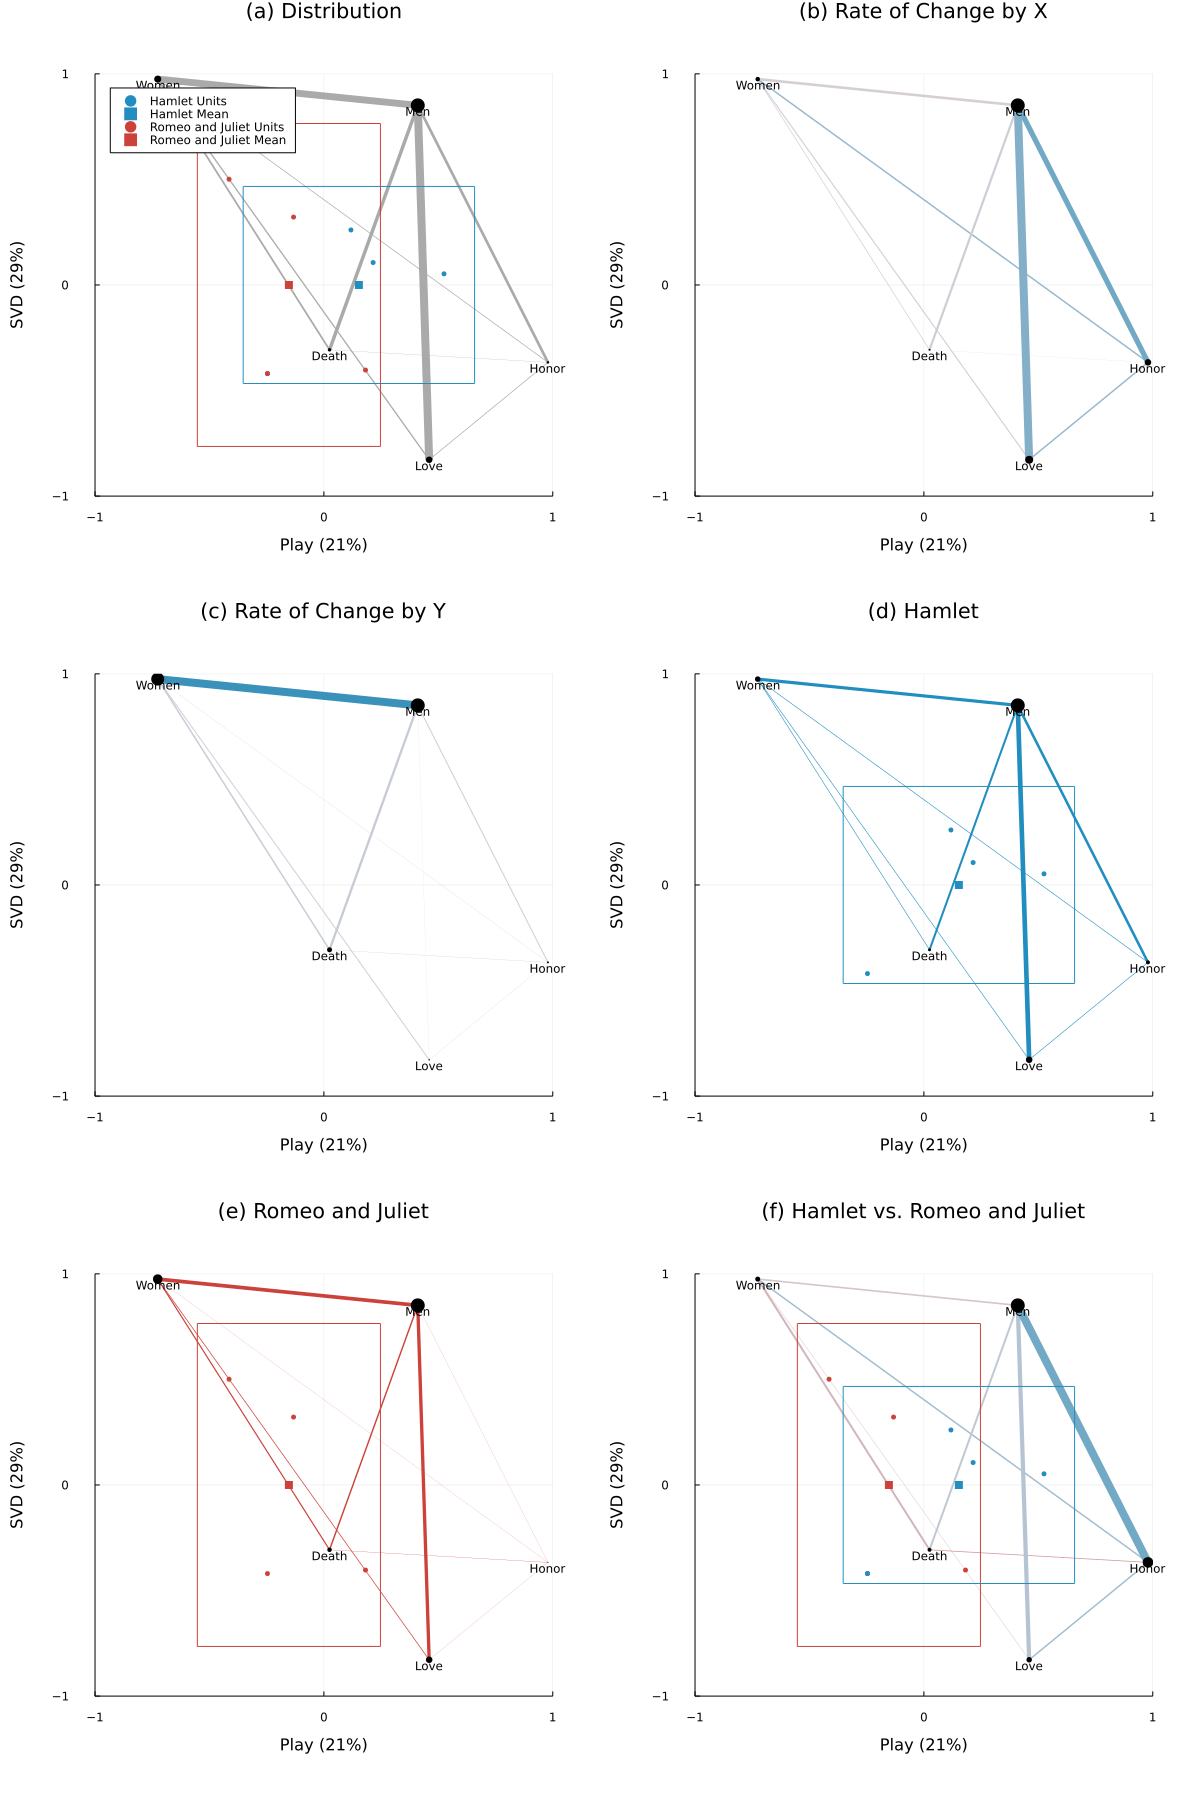

In [5]:
p = plot(myENA)
display(p)